In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

In [ ]:
base_path = "/content/drive/MyDrive/Colab Notebooks/olist/"
csv_path1 = base_path + "olist_customers_dataset.csv"
csv_path2 = base_path + "olist_geolocation_dataset.csv"
csv_path3 = base_path + "olist_order_items_dataset.csv"
csv_path4 = base_path + "olist_order_payments_dataset.csv"
csv_path5 = base_path + "olist_order_reviews_dataset.csv"
csv_path6 = base_path + "olist_orders_dataset.csv"
csv_path7 = base_path + "olist_products_dataset.csv"
csv_path8 = base_path + "olist_sellers_dataset.csv"
csv_path9 = base_path + "product_category_name_translation.csv"

In [ ]:
customers_data = pd.read_csv(csv_path1)
geolocation_data = pd.read_csv(csv_path2)
order_items_data = pd.read_csv(csv_path3)
order_payments_data = pd.read_csv(csv_path4)
order_reviews_data = pd.read_csv(csv_path5)
orders_data = pd.read_csv(csv_path6)
products_data = pd.read_csv(csv_path7)
sellers_data = pd.read_csv(csv_path8)
category_name_translation = pd.read_csv(csv_path9)

In [ ]:
customers_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
geolocation_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
order_items_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
order_items_data[order_items_data.duplicated(['order_id'])]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [ ]:
order_payments_data

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
order_reviews_data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
orders_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
products_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
sellers_data

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer


In [ ]:
products_data['product_category_name'].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [ ]:
products_data[products_data['product_category_name'].isin(category_name_translation['product_category_name'].values)==False]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_data=pd.merge(products_data, category_name_translation, on = 'product_category_name')

In [ ]:
del products_data['product_category_name']

In [ ]:
products_data.rename(columns = {'product_category_name_english':'product_category_name'},inplace=True)
products_data

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...
32336,13b25797ad1e6d6c7cd3cbeb35f8ee7a,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32337,dc36a7859b743d8610a2bbbaea26ece9,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32338,107fde0930956120d1e13dd1062fbb46,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32339,726b4e18f00255e2e63491bcba3f60b8,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [ ]:
# 결측치 확인
DF = [customers_data, geolocation_data,order_items_data, order_payments_data,order_reviews_data, orders_data,products_data,sellers_data, category_name_translation]
names = ['customers_data', 'geolocation_data','order_items_data', 'order_payments_data','order_reviews_data', 'orders_data','products_data','sellers_data','category_name_translation']

In [ ]:
customers_data.shape[0]

99441

In [ ]:
data_info = pd.DataFrame({})
data_info['dataset']=names
data_info['n_rows'] = [df.shape[0] for df in DF]
data_info['n_cols']=[df.shape[1] for df in DF]
data_info['null_amount'] = [df.isnull().sum().sum() for df in DF]
data_info['null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in DF]
data_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in DF]

data_info


,dataset,n_rows,n_cols,null_amount,null_columns,null_columns_names
0,customers_data,99441,5,0,0,
1,geolocation_data,1000163,5,0,0,
2,order_items_data,112650,7,0,0,
3,order_payments_data,103886,5,0,0,
4,order_reviews_data,99224,7,145903,2,"review_comment_title, review_comment_message"
5,orders_data,99441,8,4908,3,"order_approved_at, order_delivered_carrier_dat..."
6,products_data,32341,9,4,4,"product_weight_g, product_length_cm, product_h..."
7,sellers_data,3095,4,0,0,
8,category_name_translation,73,2,0,0,


카테고리별 구매량 - 근혜님


In [ ]:
products_data

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...
32336,13b25797ad1e6d6c7cd3cbeb35f8ee7a,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32337,dc36a7859b743d8610a2bbbaea26ece9,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32338,107fde0930956120d1e13dd1062fbb46,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32339,726b4e18f00255e2e63491bcba3f60b8,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


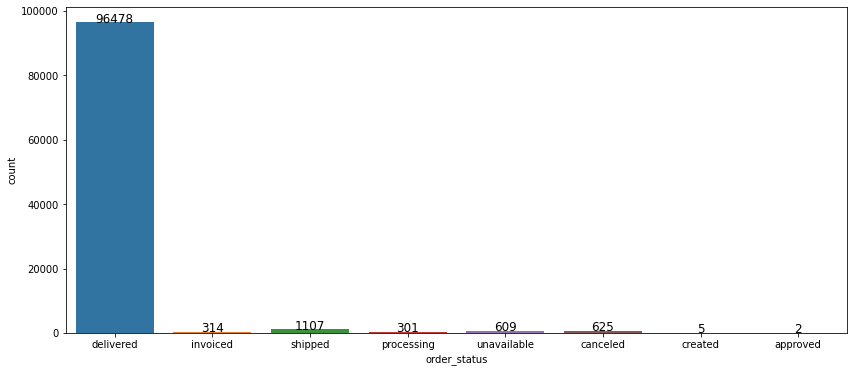

In [ ]:
df_orders = orders_data.merge(customers_data, how = 'left', on = 'customer_id')
fig, ax = plt.subplots(figsize = (14,6))
sns.countplot(x = 'order_status', data = df_orders)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
plt.show()

In [ ]:
# 지도 

In [ ]:
geolocation_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


브라질 우편번호는 우편번호(Costal Addressing Code)를 의미하며, 8자리로 구성되어 있다. 1972년 5자릿수의 시퀀스로 도입되었으며, 1992년 8자릿수로 확대되어 보다 정밀한 국지화가 가능해졌다. 표준 형식은 "nnnnn-nnn"(원래 5자리, 하이픈 및 새 3자리)입니다.

CEP: 12345-678

인구 100,000명 이상의 대부분의 도시들은 모든 공공 장소와 주요 상업 건물과 큰 주거용 콘도와 같은 높은 거주자의 개인 공간에 CEP를 할당한다. 작은 마을에는 일반적인 5자리 코드 뒤에 접미사 -000이 붙는다.  

첫 번째 부분은 Region, Subregion, Sector, Subsector 및 Subsector Splitter를 나타내는 5자리 숫자로 구성됩니다.
두 번째 부분에는 첫 번째 부분과 하이픈으로 구분된 세 자리 숫자가 포함되어 있으며 분포 식별자를 나타냅니다.

In [ ]:
geolocation_data = geolocation_data.astype({'geolocation_zip_code_prefix': str})

# Gets the first three and four first digits of zip codes, we will explore this further to understand how zip codes works
geolocation_data['geolocation_zip_code_prefix_Region'] = geolocation_data['geolocation_zip_code_prefix'].str[0:1]
geolocation_data['geolocation_zip_code_prefix_Subregion'] = geolocation_data['geolocation_zip_code_prefix'].str[0:2]
geolocation_data['geolocation_zip_code_prefix_Sector'] = geolocation_data['geolocation_zip_code_prefix'].str[0:3]
geolocation_data['geolocation_zip_code_prefix_Subsector'] = geolocation_data['geolocation_zip_code_prefix'].str[0:4]
geolocation_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_Region,geolocation_zip_code_prefix_Subregion,geolocation_zip_code_prefix_Sector,geolocation_zip_code_prefix_Subsector
0,1037,-23.545621,-46.639292,sao paulo,SP,1,10,103,1037
1,1046,-23.546081,-46.644820,sao paulo,SP,1,10,104,1046
2,1046,-23.546129,-46.642951,sao paulo,SP,1,10,104,1046
3,1041,-23.544392,-46.639499,sao paulo,SP,1,10,104,1041
4,1035,-23.541578,-46.641607,sao paulo,SP,1,10,103,1035
...,...,...,...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,9,99,999,9995
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,9,99,999,9990
1000160,99950,-28.071855,-52.014716,tapejara,RS,9,99,999,9995
1000161,99980,-28.388932,-51.846871,david canabarro,RS,9,99,999,9998


In [ ]:
geolocation_data['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,geolocation_zip_code_prefix
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


전체 19051 다른 우편 번호가 있다.  
평균적으로 각 접두사마다 52.6개의 좌표가 있다. 그러나 1.146 좌표를 사용할 수 있는 접두사가 하나 있습니다.

브라질 지역이 아닌 곳은 제외 (이상치 제거)

In [ ]:
# 브라질 지역으로만 설정
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.
geolocation_data = geolocation_data[geolocation_data.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geolocation_data = geolocation_data[geolocation_data.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geolocation_data = geolocation_data[geolocation_data.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geolocation_data = geolocation_data[geolocation_data.geolocation_lng <=  -34.79314722]

In [ ]:
!pip install datashader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 684 kB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=3e89b3e9ffa099f0be0f5f9d984cc1a29ced8062b059cbf8379eeac6f6a8b4c9
  Stored in directory: /root/.cache/pip/wheels/b5/b7/80/333a5c3312ed4cd54f5d5b869868c14e0c6002cb5c7238b52d
Successfully built datashape


그런 다음 위도와 경도 좌표를 처리하고 메르카토르(Mercator) x/y 좌표로 변환한다.


In [ ]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geolocation_data .geolocation_lng, geolocation_data .geolocation_lat)
geolocation_data ['x'] = pd.Series(x)
geolocation_data ['y'] = pd.Series(y)

In [ ]:
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_Region,geolocation_zip_code_prefix_Subregion,geolocation_zip_code_prefix_Sector,geolocation_zip_code_prefix_Subsector,x,y
0,1037,-23.545621,-46.639292,sao paulo,SP,1,10,103,1037,-5.191862e+06,-2.698137e+06
1,1046,-23.546081,-46.644820,sao paulo,SP,1,10,104,1046,-5.192478e+06,-2.698193e+06
2,1046,-23.546129,-46.642951,sao paulo,SP,1,10,104,1046,-5.192270e+06,-2.698199e+06
3,1041,-23.544392,-46.639499,sao paulo,SP,1,10,104,1041,-5.191885e+06,-2.697988e+06
4,1035,-23.541578,-46.641607,sao paulo,SP,1,10,103,1035,-5.192120e+06,-2.697646e+06


지도에 좌표를 표시합니다. 우편 번호 접두사와 해당 우편 번호의 위치 사이에는 관계가 있다.

In [ ]:
# int로 변환
geolocation_data['geolocation_zip_code_prefix'] = geolocation_data['geolocation_zip_code_prefix'].astype(int)
geolocation_data['geolocation_zip_code_prefix_Region'] = geolocation_data['geolocation_zip_code_prefix_Region'].astype(int)
geolocation_data['geolocation_zip_code_prefix_Subregion'] = geolocation_data['geolocation_zip_code_prefix_Subregion'].astype(int)
geolocation_data['geolocation_zip_code_prefix_Sector'] = geolocation_data['geolocation_zip_code_prefix_Sector'].astype(int)
geolocation_data['geolocation_zip_code_prefix_Subsector'] = geolocation_data['geolocation_zip_code_prefix_Subsector'].astype(int)

In [ ]:
brazil = geolocation_data
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].to_frame().describe()

,geolocation_zip_code_prefix
count,1.000121e+06
mean,3.657332e+04
std,3.054939e+04
min,1.001000e+03
25%,1.107500e+04
50%,2.653000e+04
75%,6.350400e+04
max,9.999000e+04


In [ ]:
!pip install geoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500 kB 4.0 MB/s 
     |████████████████████████████████| 10.8 MB 47.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 39.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 32.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 25.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.5 MB 458 kB/s 
     |███

In [ ]:
#!pip install jupyter_bokeh

In [ ]:
#!pip install holoviews

In [ ]:
#!pip install bokeh
#import bokeh
#bokeh.sampledata.download()


In [ ]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)
%env HV_DOC_HTML = True
T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    hv.extension('bokeh')
    return img

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# plot wtih datashader - image with black background
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
cm = partial(colormap_select, reverse=(background!="black"))
export = partial(export_image, background = background, export_path="export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700 

def create_map(data, cmap, data_agg, export_name='img'):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad), 
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)
        
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img, export_name)

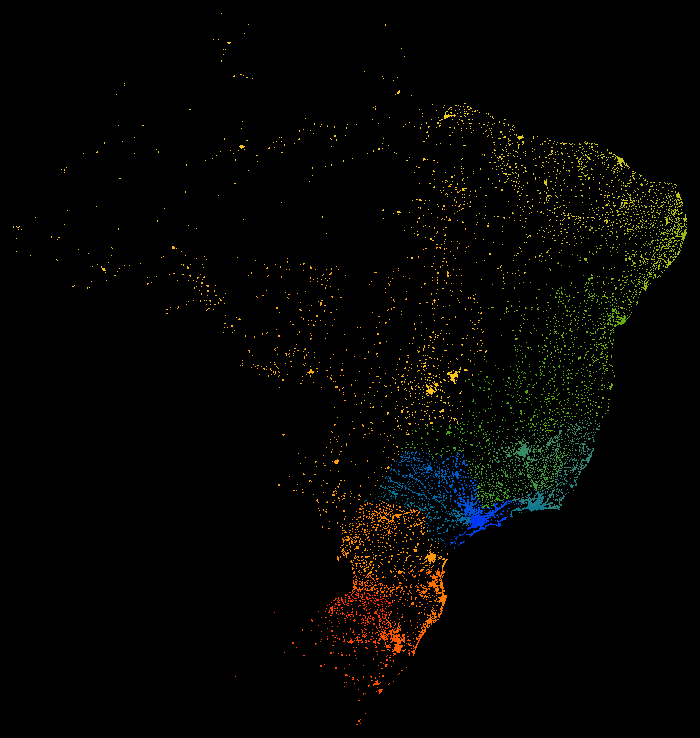

In [ ]:
create_map(brazil, rainbow, ds.mean(agg_name),'brazil_zip_codes')

주의 우편 번호
지역 수준에서 우편 번호 접두사가 어떻게 작동하는지 알아보기 위해
##  상파울루(SP) 위치 찾기

- 상파울루 주의 우편번호 접두사 범위는 01001 ~ 19990
- 0으로 시작하는 우편번호는 상파울루 메트로 지역
- 1로 시작하는 우편번호는 주 내부

In [ ]:
def filter_data(level, name):
    df = geolocation_data[geolocation_data[level] == name]
    #이상치 제거
    df = df[(df.x <= df.x.quantile(0.999)) & (df.x >= df.x.quantile(0.001))]
    df = df[(df.y <= df.y.quantile(0.999)) & (df.y >= df.y.quantile(0.001))]
    return df

In [ ]:
# 상파울로
sp = filter_data('geolocation_state', 'SP')
agg_name = 'geolocation_zip_code_prefix'
sp[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,402651.000000
mean,9030.831782
std,5101.941134
min,1001.000000
25%,4661.000000
50%,8257.000000
75%,13330.000000
max,19990.000000


In [ ]:
plot_map(sp, 'Zip Codes in Sao Paulo State', ds.min(agg_name), agg_name, cmap=rainbow)

Output hidden; open in https://colab.research.google.com to view.

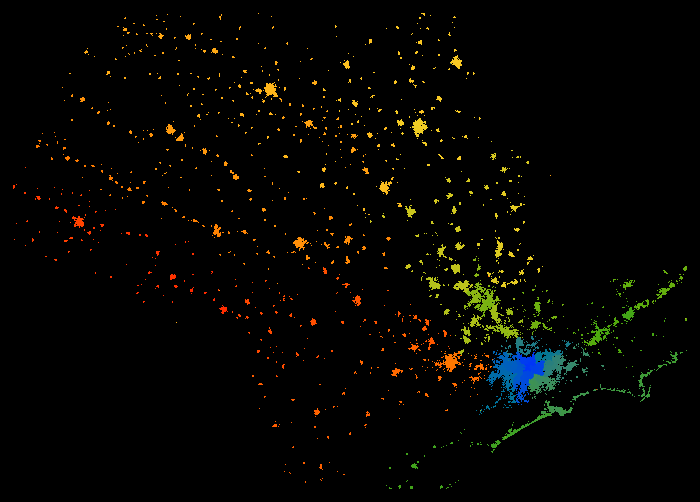

In [ ]:
create_map(sp, rainbow, ds.mean(agg_name), 'sp_zip_codes')

대도시의 우편번호
## 상파울루 시에 우편번호

상파울루 시의 우편 번호 접두사는 01001에서 09540까지입니다.





In [ ]:
saopaulo = filter_data('geolocation_city', 'sao paulo')
agg_name = 'geolocation_zip_code_prefix'
saopaulo[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,135256.000000
mean,4137.454996
std,1804.189554
min,1001.000000
25%,2941.000000
50%,4166.000000
75%,5158.000000
max,9540.000000


In [ ]:
plot_map(saopaulo, 'Zip Codes in Sao Paulo City', ds.min(agg_name), agg_name, cmap=rainbow)

Output hidden; open in https://colab.research.google.com to view.

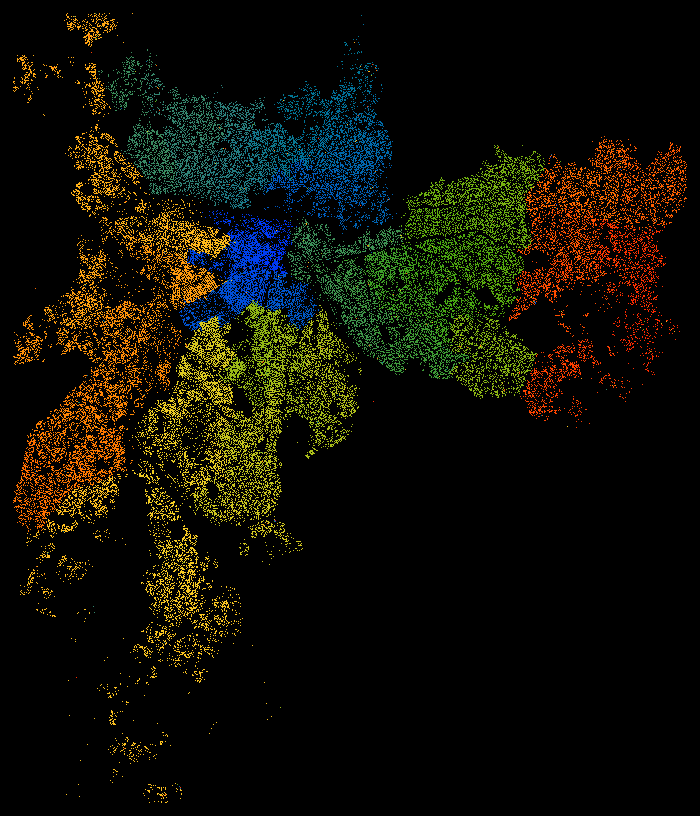

In [ ]:
create_map(saopaulo, rainbow, ds.mean(agg_name), 'sao_paulo_zip_codes')

소도시의 우편번호
## 아티바 시

아티바 시의 우편번호 접두사는 12940 과 12954 사이이다.
하지만 같은 우편번호 접두사를 가진 다른 이웃 도시들도 있다.
더 자세한 내용을 알고싶으면 우편 번호(4번째와 5번째 숫자)가 더 필요하다.

In [ ]:
atibaia = geolocation_data[geolocation_data['geolocation_city'] == 'atibaia']
agg_name = 'geolocation_zip_code_prefix'
atibaia[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,1254.000000
mean,12945.042265
std,4.197704
min,12940.000000
25%,12942.000000
50%,12944.000000
75%,12948.000000
max,12954.000000


In [ ]:
plot_map(atibaia, 'Zip Codes in Atibaia', ds.min(agg_name), agg_name, cmap=rainbow)

Output hidden; open in https://colab.research.google.com to view.

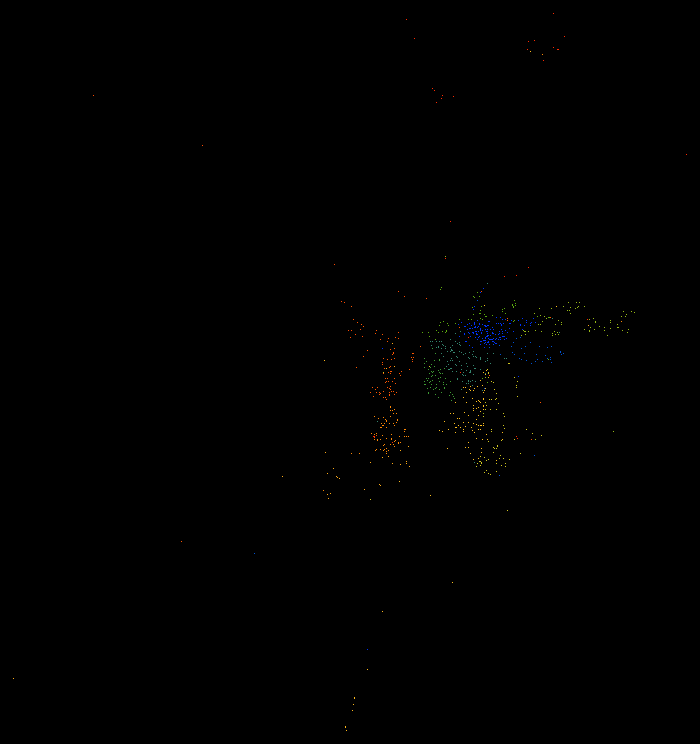

In [ ]:
create_map(atibaia, rainbow, ds.mean(agg_name), 'atibaia_zip_codes')


## 우편 번호의 범위
우편번호의 모든 숫자는 무엇을 의미하나요? 1 ~ 5자리 사이의 동작 방식을 확인  

2로 시작하는 우편번호는 모두 리우데자네이루(RJ) 및 에스피리토 산토(ES) 주  
3으로 시작하는 우편번호는	미나스제라이스(MG)주

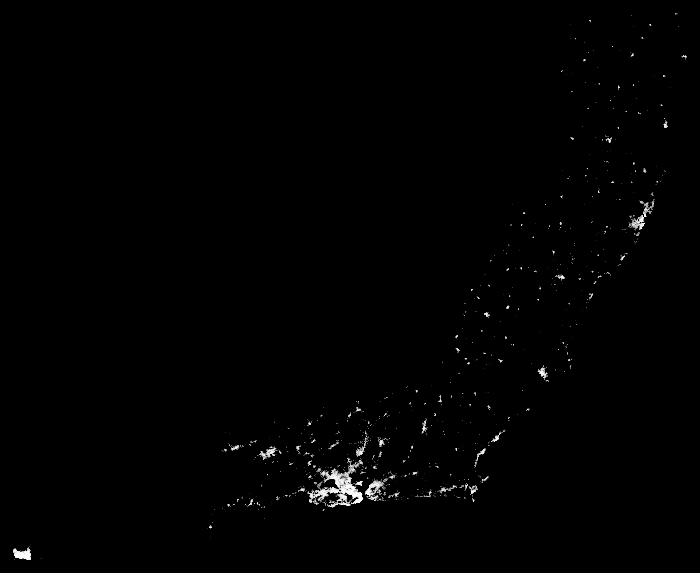

In [ ]:
# Zip code: 2
# 리우데자네이루(RJ) 및 에스피리토 산토(ES) 주
df = filter_data('geolocation_zip_code_prefix_Region', 2)
create_map(df, cm(Greys9), ds.count(), 'zip_code_2')

29로 시작하는 우편번호는 모두 에스피리토 산토(ES) 주 내에 있지만 여러 지역을 나타난다.

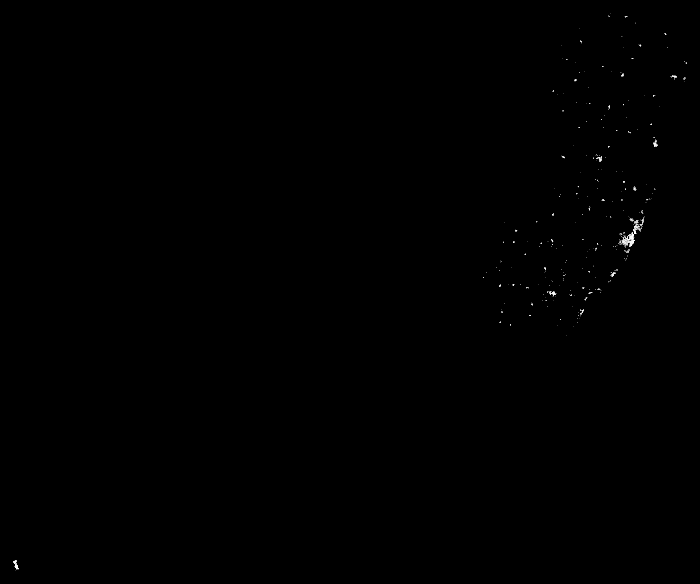

In [ ]:
# Zip code: 29
df = filter_data('geolocation_zip_code_prefix_Subregion', 29)
create_map(df, cm(Greys9), ds.count(), 'zip_code_29')

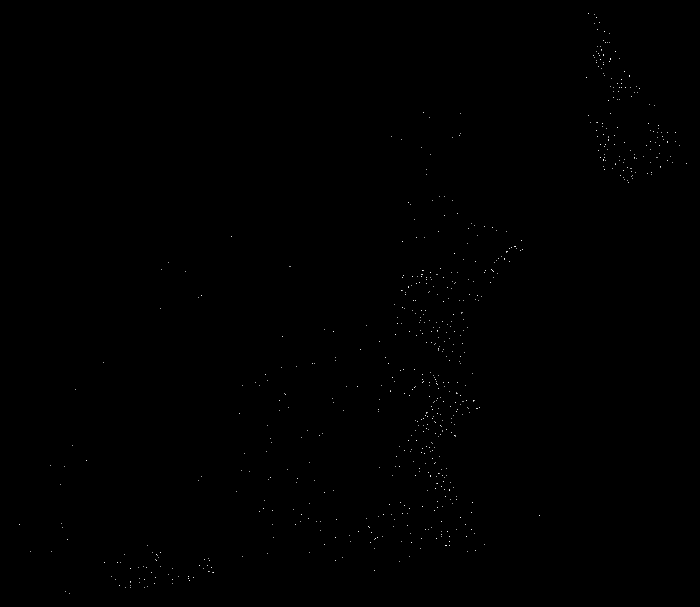

In [ ]:
# Zip code: 290
df = filter_data('geolocation_zip_code_prefix_Sector', 290)
create_map(df, cm(Greys9), ds.count(), 'zip_code_290')


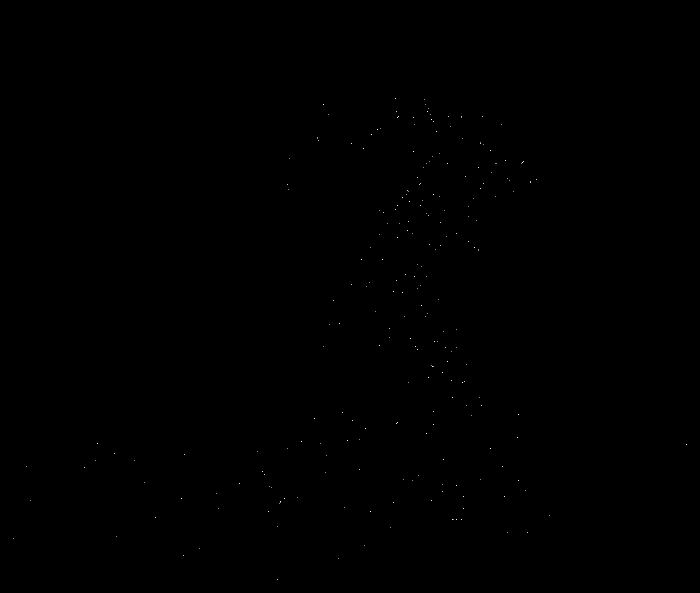

In [ ]:
# Zip code: 2905
df = filter_data('geolocation_zip_code_prefix_Subsector', 2905)
create_map(df, cm(Greys9), ds.count(), 'zip_code_2205')

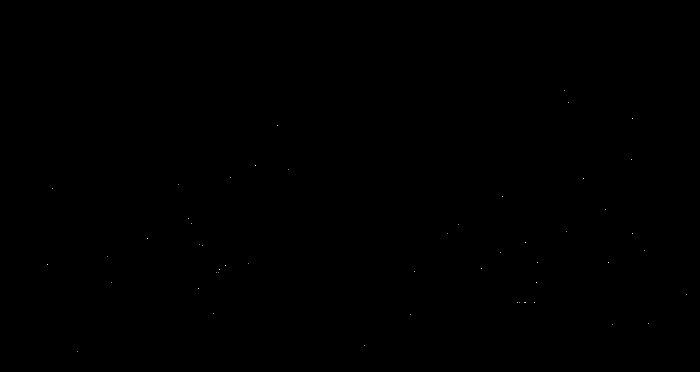

In [ ]:
# Zip code: 29050
df = filter_data('geolocation_zip_code_prefix', 29050)
create_map(df, cm(Greys9), ds.count(), 'zip_code_29050')


따라서 우편 번호의 수를 늘리면 데이터의 하위 집합을 선택할 수 있다.

## 지역별 수익

우편번호 5자리로 작업하면 일부 지역에서 매우 작은 샘플로 이어질 수 있으므로 3자리로 작업  
우편번호 접두사별로 분류된 제품 가치의 합계를 그림으로 표시하면 대부분의 수익이 브라질 남동부와 남부 지역에서 발생했음을 알 수 있다. 인구가 더 많은 대도시와 수도가 수익에 더 많이 참여하는 것도 확인할 수 있다.


## < 사용한 데이터셋 >
orders_data

order_items_data  

order_reviews_data 

customers_data

In [ ]:
customers_data = customers_data.astype({'customer_zip_code_prefix': str})

# 우편번호 앞자리 3개만 가져오기. 
customers_data['customer_zip_code_prefix_Sector'] = customers_data['customer_zip_code_prefix'].str[0:3]
customers_data['customer_zip_code_prefix_Sector'] = customers_data['customer_zip_code_prefix_Sector'].astype(int)
# 브라질 우편 번호 앞자리 3개인 Sector를 인덱스로 하는 datset을 복사.
brazil_geo = geolocation_data.set_index('geolocation_zip_code_prefix_Sector').copy()


In [ ]:
brazil_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_Region,geolocation_zip_code_prefix_Subregion,geolocation_zip_code_prefix_Subsector,x,y
geolocation_zip_code_prefix_Sector,,,,,,,,,,
103,1037,-23.545621,-46.639292,sao paulo,SP,1,10,1037,-5.191862e+06,-2.698137e+06
104,1046,-23.546081,-46.644820,sao paulo,SP,1,10,1046,-5.192478e+06,-2.698193e+06
104,1046,-23.546129,-46.642951,sao paulo,SP,1,10,1046,-5.192270e+06,-2.698199e+06
104,1041,-23.544392,-46.639499,sao paulo,SP,1,10,1041,-5.191885e+06,-2.697988e+06
103,1035,-23.541578,-46.641607,sao paulo,SP,1,10,1035,-5.192120e+06,-2.697646e+06
...,...,...,...,...,...,...,...,...,...,...
999,99950,-28.068639,-52.010705,tapejara,RS,9,99,9995,-5.789805e+06,-3.257630e+06
999,99900,-27.877125,-52.224882,getulio vargas,RS,9,99,9990,-5.813647e+06,-3.233491e+06
999,99950,-28.071855,-52.014716,tapejara,RS,9,99,9995,-5.790252e+06,-3.258036e+06


In [ ]:
# merging the data
orders = orders_data.merge(order_items_data, on='order_id')
orders = orders.merge(customers_data, on='customer_id')
orders = orders.merge(order_reviews_data, on='order_id')

In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_zip_code_prefix_Sector,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,314,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,478,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,752,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,592,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,919,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,117,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
112368,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,459,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
112369,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b

In [ ]:
# 소비자의 우편번호를 기준으로 소비 가격 합하기.
gp = orders.groupby('customer_zip_code_prefix_Sector')['price'].sum().to_frame()
# 소비 가격 합한 것 우편번호 기준으로 join
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price / 1000 

In [ ]:
revenue

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_Region,geolocation_zip_code_prefix_Subregion,geolocation_zip_code_prefix_Subsector,x,y,price,revenue
100,1009,-23.546935,-46.636588,sao paulo,SP,1,10,1009,-5.191561e+06,-2.698297e+06,3585.82,3.58582
100,1009,-23.545430,-46.635715,sao paulo,SP,1,10,1009,-5.191464e+06,-2.698114e+06,3585.82,3.58582
100,1007,-23.550393,-46.637302,sao paulo,SP,1,10,1007,-5.191641e+06,-2.698716e+06,3585.82,3.58582
100,1005,-23.549819,-46.635606,sao paulo,SP,1,10,1005,-5.191452e+06,-2.698647e+06,3585.82,3.58582
100,1009,-23.545692,-46.635866,sao paulo,SP,1,10,1009,-5.191481e+06,-2.698146e+06,3585.82,3.58582
...,...,...,...,...,...,...,...,...,...,...,...,...
999,99950,-28.068639,-52.010705,tapejara,RS,9,99,9995,-5.789805e+06,-3.257630e+06,8679.49,8.67949
999,99900,-27.877125,-52.224882,getulio vargas,RS,9,99,9990,-5.813647e+06,-3.233491e+06,8679.49,8.67949
999,99950,-28.071855,-52.014716,tapejara,RS,9,99,9995,-5.790252e+06,-3.258036e+06,8679.49,8.67949
999,99980,-28.388932,-51.846871,david canabarro,RS,9,99,9998,-5.771567e+06,-3.298098e+06,8679.49,8.67949


In [ ]:
# 수익
plot_map(revenue, 'Orders Revenue (thousands R$)', ds.mean(agg_name), agg_name, cmap=fire)

Output hidden; open in https://colab.research.google.com to view.

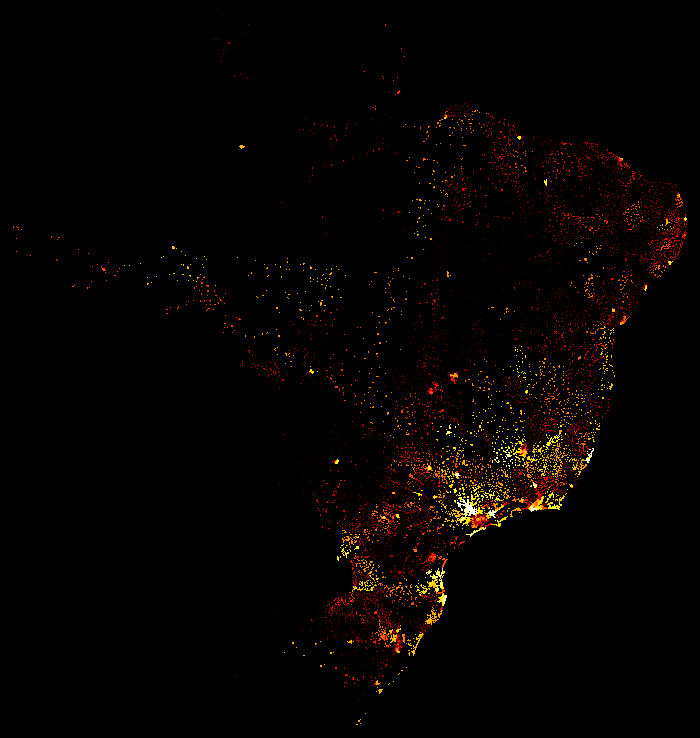

In [ ]:
create_map(revenue, fire, ds.mean(agg_name), 'revenue_brazil')

## 평균 구매가격 얼마입니까?
브라질 남부 및 남동부 지역의 고객들은 북부 및 북동부 지역의 다른 고객들보다 평균 구매가격이 더 낮습니다.

In [ ]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'customer_zip_code_prefix_Sector': 'max'})
gp = gp.groupby('customer_zip_code_prefix_Sector')['price'].mean().to_frame()
avg_ticket = brazil_geo.join(gp)
agg_name = 'avg_ticket'
avg_ticket[agg_name] = avg_ticket.price

In [ ]:
plot_map(avg_ticket, 'Orders Average Ticket (R$)', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

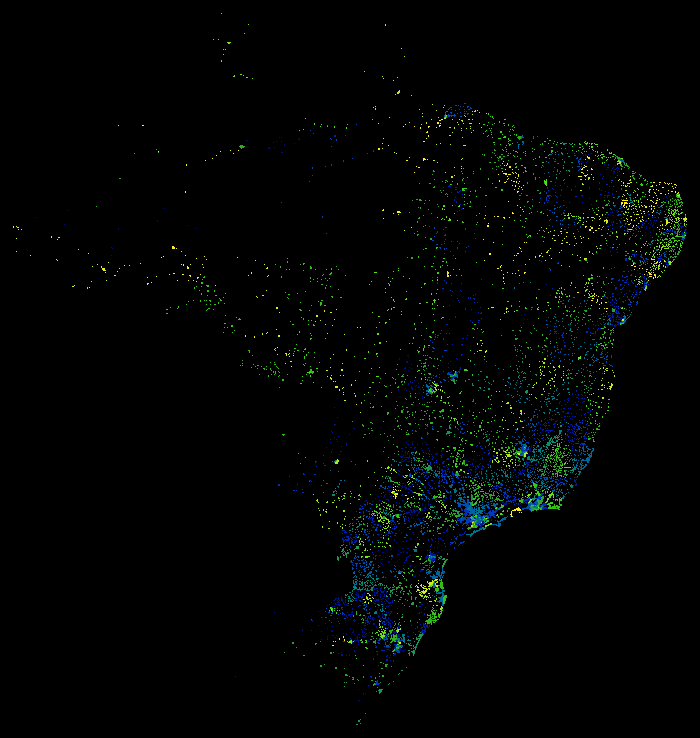

In [ ]:
create_map(avg_ticket, bgy, ds.mean('avg_ticket'), 'avg_ticket_brazil')

## 누가 배송비를 더 많이 내나요?
배송비를 주문비로 나누면 운송 비율을 찾을 수 있습니다. 이 비율은 주문품을 배달하기 위해 사람이 지불해야 했던 제품 가격의 백분율  
예를 들어, 제품의 가격이 50.00이고 배송비가 10.00인 경우 운송 비율은 0.2 또는 20%입니다.  
높은 운임 비율은 고객들이 구매를 완료하지 못하게 할 가능성이 매우 높다.  
물류 비용 때문에 인구 밀도가 높은 지역에서는 낮은 운임 비율이, 희박한 지역에서는 높은 운임 비율이 예상된다.

In [ ]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum', 'customer_zip_code_prefix_Sector': 'max'})
agg_name = 'freight_ratio'
gp[agg_name] = gp.freight_value / gp.price
gp = gp.groupby('customer_zip_code_prefix_Sector')[agg_name].mean().to_frame()
freight_ratio = brazil_geo.join(gp)

In [ ]:
plot_map(freight_ratio, 'Orders Average Freight Ratio', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

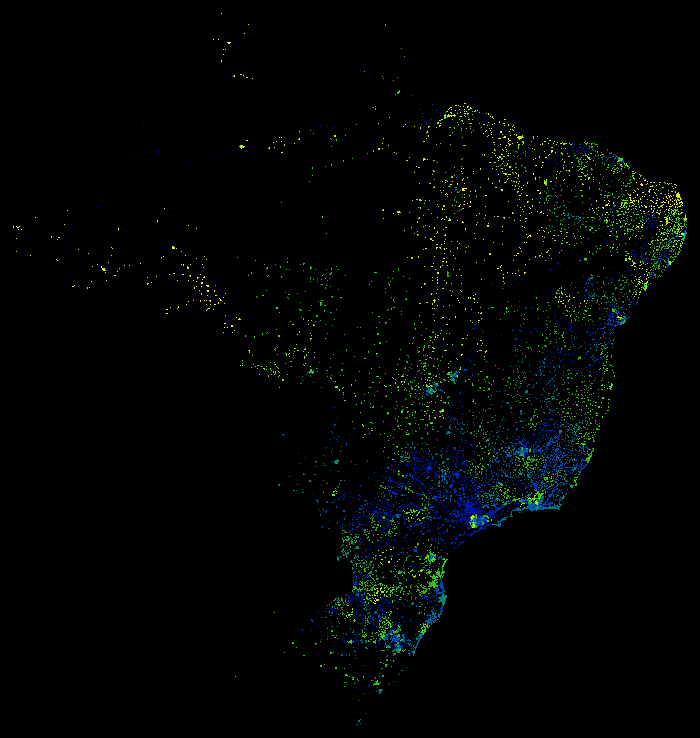

In [ ]:
create_map(freight_ratio, bgy, ds.mean('freight_ratio'), 'freight_ratio_brazil')

## 평균 배송 시간
브라질의 북쪽과 북동쪽에 사는 사람들은 더 높은 운송비를 부담해야 하고  
구매를 받기 위해 더 오래 기다려야 한다.

In [ ]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date) # 배송 시작일
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date) # 예상된 배송 도착일
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date) # 배송 도착일
# 배송완료된 날자에서 배송이 옮겨지기 시작한 날짜를 빼면 배송 소요일 
orders['actual_delivery_time'] = orders.order_delivered_customer_date - orders.order_delivered_carrier_date
orders['actual_delivery_time'] = orders['actual_delivery_time'].dt.days

In [ ]:
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
delivery_time = brazil_geo.join(gp)
agg_name = 'avg_delivery_time'
delivery_time[agg_name] = delivery_time['actual_delivery_time']

In [ ]:
plot_map(delivery_time, 'Orders Average Delivery Time (days)', ds.mean(agg_name), agg_name, cmap=bjy)

Output hidden; open in https://colab.research.google.com to view.

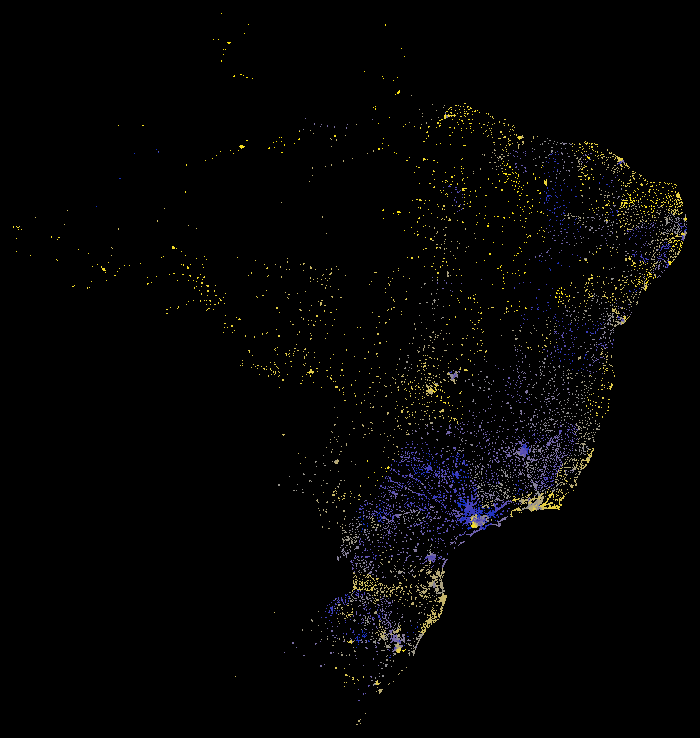

In [ ]:
create_map(delivery_time, bjy, ds.mean(agg_name), 'avg_delivery_time_brazil')


주 별로 봤을 때, 파라나 주(PR)에서 볼 수 있듯이 대도시가 소도시에 비해 평균 배송시간이 짧다는 것을 알 수 있다.

In [ ]:
pr = filter_data('geolocation_state', 'PR').set_index('geolocation_zip_code_prefix_Sector')
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
pr_delivery_time = pr.join(gp)
pr_delivery_time[agg_name] = pr_delivery_time['actual_delivery_time']

In [ ]:
plot_map(pr_delivery_time, 'Orders Average Delivery Time in Parana State (days)', ds.mean(agg_name), agg_name, cmap=bjy)


Output hidden; open in https://colab.research.google.com to view.

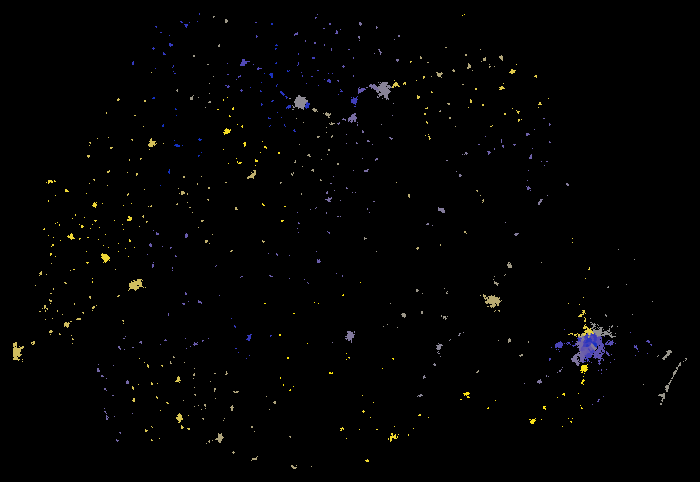

In [ ]:
create_map(pr_delivery_time, bjy, ds.mean(agg_name), 'avg_delivery_time_pr')


## 브라질 교외
다른 나라들과 달리, 브라질에서 가장 부유한 지역은 보통 도심 근처이고 교외는 빈곤과 폭력률이 높다고 한다. 

In [ ]:
riodejaneiro = filter_data('geolocation_city', 'rio de janeiro').set_index('geolocation_zip_code_prefix_Sector')
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
rj_delivery_time = riodejaneiro.join(gp)
rj_delivery_time[agg_name] = rj_delivery_time['actual_delivery_time']

In [ ]:
plot_map(rj_delivery_time, 'Orders Average Delivery Time in Rio de Janeiro (days)', ds.mean(agg_name), agg_name, cmap=bjy)

Output hidden; open in https://colab.research.google.com to view.

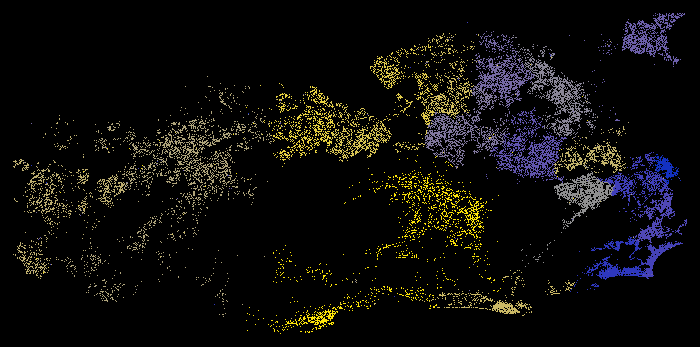

In [ ]:
create_map(rj_delivery_time, bjy, ds.mean(agg_name), 'rio_de_janeiro_avg_delivery_time')


다운타운, 보타포고, 코파카바나, 플라멩고와 같은 부유한 동네에 살면  
시다데 데우스나 뱅구 같은 가난한 동네에 사는 사람보다 5일 일찍 주문을 받을 가능성이 높은 것으로 나타났다.  
상파울루와 포르투 알레그레에서도 같은 패턴을 볼 수 있습니다. 도심 근처의 고객들은 교외에 사는 고객들보다 주문을 더 빨리 받는다.

In [ ]:
saopaulo = filter_data('geolocation_city', 'sao paulo').set_index('geolocation_zip_code_prefix_Sector')
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
sp_delivery_time = saopaulo.join(gp)
sp_delivery_time[agg_name] = sp_delivery_time['actual_delivery_time']

In [ ]:
plot_map(sp_delivery_time, 'Orders Average Delivery Time in Sao Paulo (days)', ds.mean(agg_name), agg_name, cmap=bjy)

Output hidden; open in https://colab.research.google.com to view.

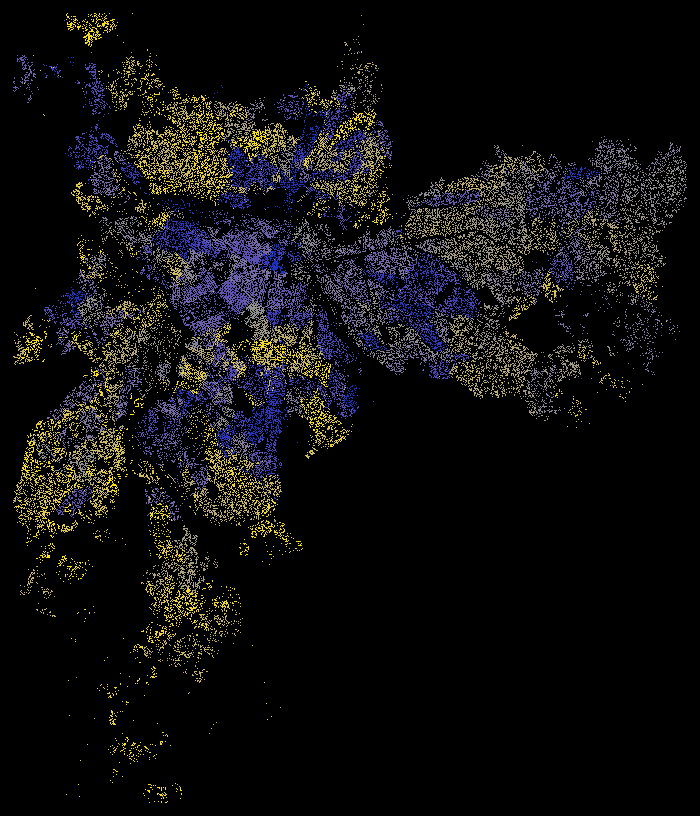

In [ ]:
create_map(sp_delivery_time, bjy, ds.mean(agg_name), 'sao_paulo_avg_delivery_time')

In [ ]:
poa = filter_data('geolocation_city', 'porto alegre').set_index('geolocation_zip_code_prefix_Sector')
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
poa_delivery_time = poa.join(gp)
poa_delivery_time[agg_name] = poa_delivery_time['actual_delivery_time']

In [ ]:
plot_map(poa_delivery_time, 'Orders Average Delivery Time in Porto Alegre (days)', ds.mean(agg_name), agg_name, cmap=bjy)

Output hidden; open in https://colab.research.google.com to view.

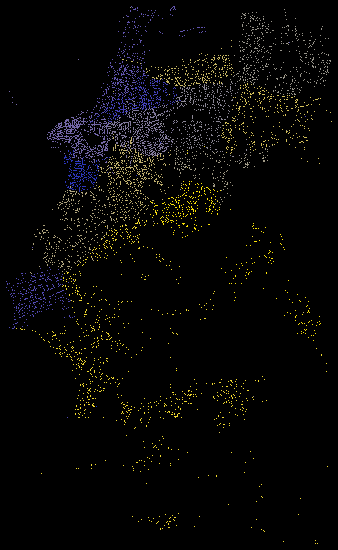

In [ ]:
create_map(poa_delivery_time, bjy, ds.mean(agg_name), 'poa_avg_delivery_time')

## 주문 리뷰 평균
리우데자네이루 주와 북동부 지역의 고객들은 구매 시 낮은 점수를 줄 가능성이 높습니다.

In [ ]:
gp = orders.groupby('customer_zip_code_prefix_Sector')['review_score'].mean().to_frame()
score = brazil_geo.join(gp)
agg_name = 'avg_score'
score[agg_name] = score['review_score']

In [ ]:
plot_map(score, 'Orders Average Review Score', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

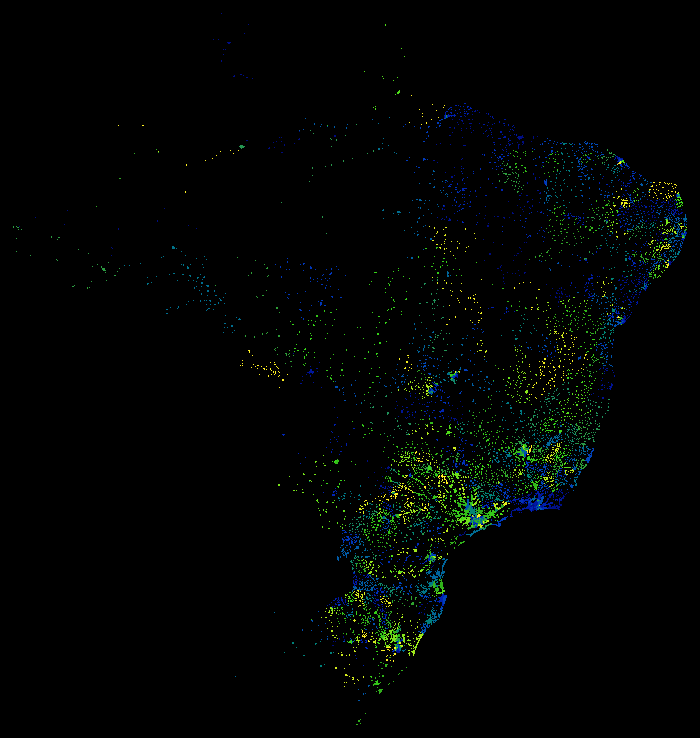

In [ ]:
create_map(score, bgy, ds.mean(agg_name), 'avg_review_score_brazil')

## 리우데자네이루의 평균 리뷰 점수를 자세히 보면, 평균 배송 시간과 어떤 관계가 있을까요?


In [ ]:
rj_score = riodejaneiro.join(gp)
rj_score[agg_name] = rj_score['review_score']

In [ ]:
plot_map(rj_score, 'Orders Average Review Score in Rio de Janeiro', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

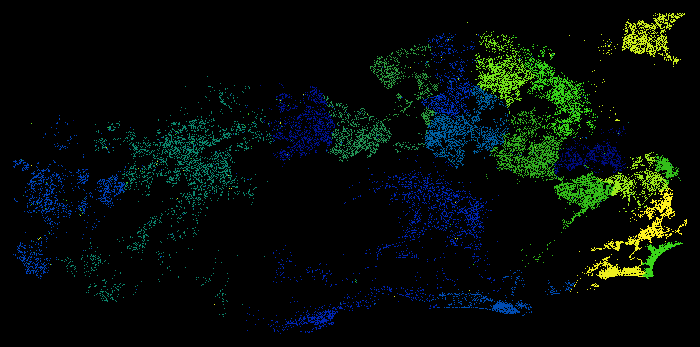

In [ ]:
create_map(rj_score, bgy, ds.mean(agg_name), 'rio_de_janeiro_score')

## 지연된 주문
지연된 주문의 비율을 측정하여 고객의 리뷰 점수와 어떤 관계가 있을까요?

In [ ]:
# 배송 에측일보다 배송 완료일이 더 크면 지연된 배송
orders['is_delayed'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date'] 
gp = orders.groupby('customer_zip_code_prefix_Sector').agg({'is_delayed': ['sum', 'count']})
agg_name = 'delayed'
# 지연 비율
gp[agg_name] = gp['is_delayed']['sum'] / gp['is_delayed']['count']
gp = gp[agg_name]
order_delay = brazil_geo.join(gp)

In [ ]:
plot_map(order_delay, 'Orders Delay Percentage in Brazil', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

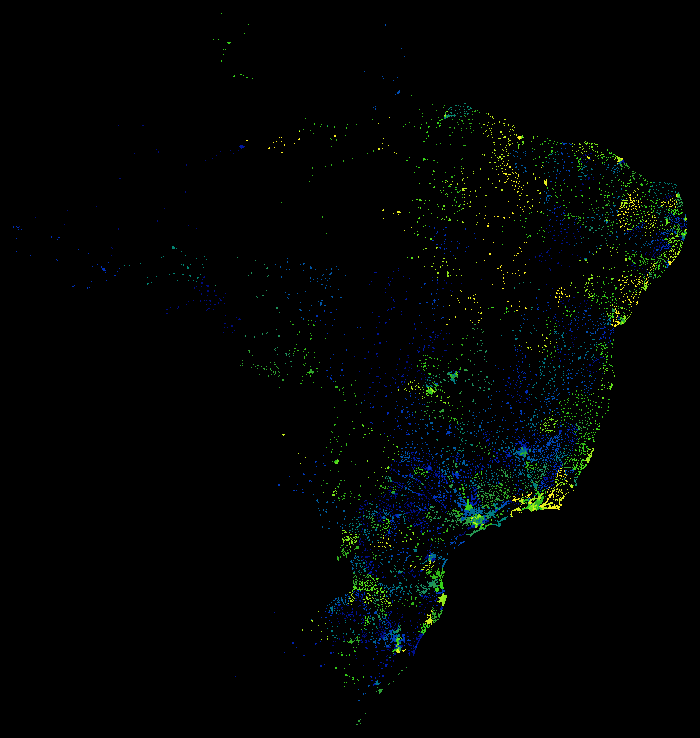

In [ ]:
create_map(order_delay, bgy, ds.mean(agg_name), 'brazil_order_delay_percentage')


리오데자네이루를 다시 한 번 보고 주문 배송이 지연될 가능성이 더 높은 곳을 살펴본다.

In [ ]:
rj_delay = riodejaneiro.join(gp)


In [ ]:
plot_map(rj_delay, 'Orders Delay Percentage in Rio de Janeiro', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

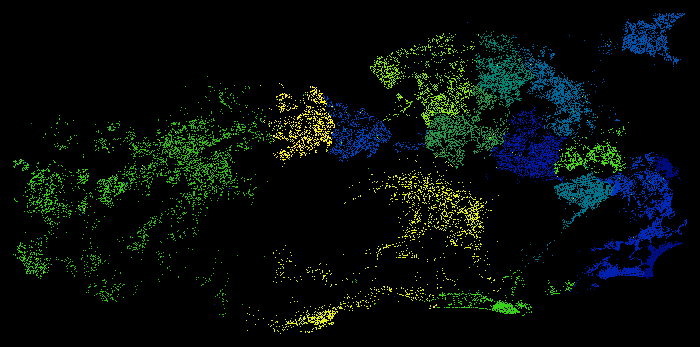

In [ ]:
create_map(rj_delay, bgy, ds.mean(agg_name), 'rio_de_janeiro_order_delay_percentage')

작은 마을의 고객은 한 번 주문하면 더 많은 물건을 주문할까?  
대도시에 더 멀리 있는 고객들이 대량으로 구매하는지 주문당 평균 품목 수량을 확인해보자.

In [ ]:
orders['count'] = 1
gp = orders.groupby(['customer_zip_code_prefix_Sector','order_id'], as_index=False)['count'].count()
gp = gp.groupby('customer_zip_code_prefix_Sector')['count'].mean().to_frame()
avg_qty = brazil_geo.join(gp)
agg_name = 'avg_qty'
avg_qty[agg_name] = avg_qty['count']

In [ ]:
plot_map(avg_qty, 'Average Item Quantity', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

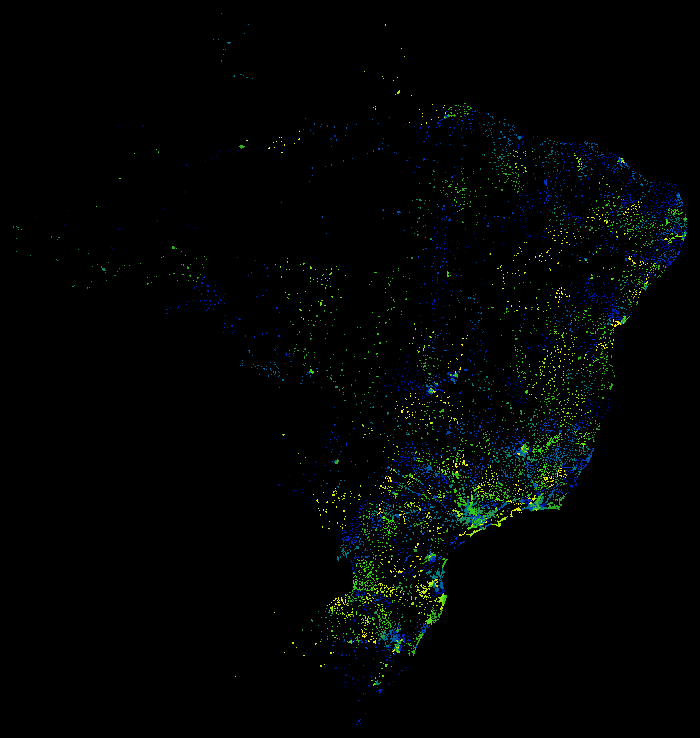

In [ ]:
create_map(avg_qty, bgy, ds.mean(agg_name), 'avg_qty_items')

분명히 그 가설은 거짓이다. 대도시의 고객들은 주문당 더 많은 제품을 사는 것 같다.  
하지만 더 이상의 결론을 내릴 수 있는 명확한 지리적 패턴이 없습니다.